In [1]:
import pandas as pd

df = pd.read_csv('financial_data.csv')
df2 = pd.read_csv('normalized_financial_data.csv')

In [2]:
target = "monthly_return"

In [3]:
# Drop non-numeric columns like Ticker, Sector, and Date
X = df2.select_dtypes(include=["number"]).drop(columns=[target], errors="ignore")

# Define target variable
y = df2[target]

# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (14372, 104)
Test set size: (3594, 104)


In [4]:
# BASELINE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Linear Regression R²: {r2_lr:.4f}")


Linear Regression MSE: 3.3091
Linear Regression R²: -0.0054


monthly_return                       1.000000
netIncomeFromContinuingOperations    0.077248
comprehensiveIncomeNetOfTax          0.063265
changeInExchangeRate                 0.041986
shortTermInvestments                 0.040068
operatingIncome                      0.036341
surprise                             0.033221
totalNonCurrentLiabilities           0.033132
Close                                0.033112
totalNonCurrentAssets                0.032731
interestExpense                      0.032005
Low                                  0.030542
interestAndDebtExpense               0.027800
propertyPlantEquipment               0.025775
investments                          0.022926
Name: monthly_return, dtype: float64


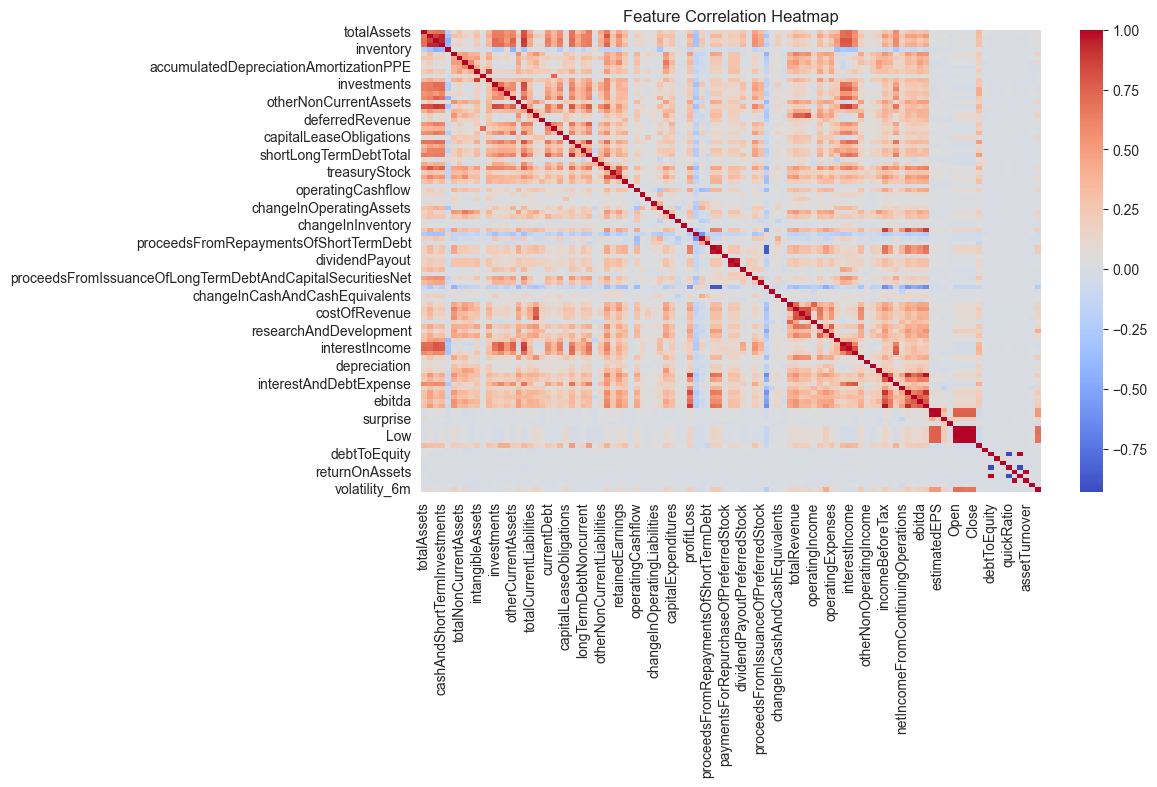

In [5]:
# FEATURE SELECTION

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are included
df_numeric = df2.select_dtypes(include=["number"])

# Compute correlation with the target variable
correlation_matrix = df_numeric.corr()

# Get top correlated features with monthly_return
correlated_features = correlation_matrix["monthly_return"].abs().sort_values(ascending=False)

# Show top correlated features
print(correlated_features.head(15))

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Top Features

top_features = [
    "netIncomeFromContinuingOperations",
    "comprehensiveIncomeNetOfTax",
    "changeInExchangeRate",
    "shortTermInvestments",
    "operatingIncome",
    "surprise",
    "totalNonCurrentLiabilities",
    "Close",
    "totalNonCurrentAssets",
    "interestExpense"
]

# Select only these features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Predictions
y_pred_lr_selected = lr_model.predict(X_test_selected)

# Evaluate Model
mse_lr_selected = mean_squared_error(y_test, y_pred_lr_selected)
r2_lr_selected = r2_score(y_test, y_pred_lr_selected)

print(f"Linear Regression (Top Features) MSE: {mse_lr_selected:.4f}")
print(f"Linear Regression (Top Features) R²: {r2_lr_selected:.4f}")


Linear Regression (Top Features) MSE: 3.2928
Linear Regression (Top Features) R²: -0.0005


In [8]:
results = {
    "Model": ["Linear Regression (All Features)", "Linear Regression (Top Features)"],
    "MSE": [mse_lr, mse_lr_selected],
    "R² Score": [r2_lr, r2_lr_selected]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                              Model       MSE  R² Score
0  Linear Regression (All Features)  3.309138 -0.005439
1  Linear Regression (Top Features)  3.292781 -0.000469


In [9]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # Try different alpha values
ridge_model.fit(X_train_selected, y_train)

y_pred_ridge = ridge_model.predict(X_test_selected)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")


Ridge Regression MSE: 3.2928
Ridge Regression R²: -0.0005


In [10]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)  # Try different alpha values
lasso_model.fit(X_train_selected, y_train)

y_pred_lasso = lasso_model.predict(X_test_selected)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression R²: {r2_lasso:.4f}")

Lasso Regression MSE: 3.2877
Lasso Regression R²: 0.0011


In [11]:
results = {
    "Model": [
        "Linear Regression (All Features)",
        "Linear Regression (Top Features)",
        "Ridge Regression",
        "Lasso Regression"
    ],
    "MSE": [mse_lr, mse_lr_selected, mse_ridge, mse_lasso],
    "R² Score": [r2_lr, r2_lr_selected, r2_ridge, r2_lasso]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                              Model       MSE  R² Score
0  Linear Regression (All Features)  3.309138 -0.005439
1  Linear Regression (Top Features)  3.292781 -0.000469
2                  Ridge Regression  3.292780 -0.000469
3                  Lasso Regression  3.287694  0.001076


In [12]:
from sklearn.linear_model import LassoCV

# Lasso with Cross-Validation to Find Best Alpha
lasso_cv_model = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], cv=5)
lasso_cv_model.fit(X_train_selected, y_train)

# Best Alpha
best_alpha = lasso_cv_model.alpha_
print(f"Best Alpha for Lasso: {best_alpha}")

# Evaluate Optimized Lasso
y_pred_lasso_cv = lasso_cv_model.predict(X_test_selected)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print(f"Optimized Lasso MSE: {mse_lasso_cv:.4f}")
print(f"Optimized Lasso R²: {r2_lasso_cv:.4f}")

Best Alpha for Lasso: 0.01
Optimized Lasso MSE: 3.2877
Optimized Lasso R²: 0.0011


In [13]:
df["prev_month_close"] = df["Close"].shift(1)  # Previous month's closing price
df["price_change"] = df["Close"] - df["prev_month_close"]

# Add to feature set
X_train["price_change"] = X_train["Close"] - X_train["Close"].shift(1)
X_test["price_change"] = X_test["Close"] - X_test["Close"].shift(1)

In [14]:
results = {
    "Model": [
        "Linear Regression (Top Features)",
        "Optimized Lasso Regression",
    ],
    "MSE": [mse_lr_selected, mse_lasso_cv],
    "R² Score": [r2_lr_selected, r2_lasso_cv]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                              Model       MSE  R² Score
0  Linear Regression (Top Features)  3.292781 -0.000469
1        Optimized Lasso Regression  3.287694  0.001076


In [15]:
# Create stock momentum features
df2["prev_month_close"] = df2.groupby("Ticker")["Close"].shift(1)  # Previous month's closing price
df2["price_change"] = df2["Close"] - df2["prev_month_close"]  # Monthly price change
df2["price_change_pct"] = df2["price_change"] / df2["prev_month_close"]  # Percentage change
df2["volatility_3m"] = df2.groupby("Ticker")["Close"].rolling(window=3).std().reset_index(0, drop=True)  # 3-month volatility

# Drop rows with NaN (first month has no prev_month_close)
df2.dropna(inplace=True)

# Add new features to model
top_features.extend(["price_change", "price_change_pct", "volatility_3m"])


In [16]:
# Select updated features
X = df2[top_features]
y = df2["monthly_return"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso with cross-validation
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], cv=5)
lasso_cv_model.fit(X_train, y_train)

# Evaluate the new Lasso model
y_pred_lasso_cv = lasso_cv_model.predict(X_test)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print(f"Optimized Lasso (With Price Features) MSE: {mse_lasso_cv:.4f}")
print(f"Optimized Lasso (With Price Features) R²: {r2_lasso_cv:.4f}")


Optimized Lasso (With Price Features) MSE: 0.4622
Optimized Lasso (With Price Features) R²: 0.0956


In [17]:
results = {
    "Model": [
        "Optimized Lasso (Without Prices)",
        "Optimized Lasso (With Price Features)"
    ],
    "MSE": [mse_lasso, mse_lasso_cv],
    "R² Score": [r2_lasso, r2_lasso_cv]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                                   Model       MSE  R² Score
0       Optimized Lasso (Without Prices)  3.287694  0.001076
1  Optimized Lasso (With Price Features)  0.462168  0.095561


In [18]:
# Create 5-day & 10-day Moving Averages
df2["SMA_5"] = df2.groupby("Ticker")["Close"].transform(lambda x: x.rolling(5).mean())  # 5-day Simple Moving Average
df2["SMA_10"] = df2.groupby("Ticker")["Close"].transform(lambda x: x.rolling(10).mean())  # 10-day SMA

# Create 5-day Rolling Volatility (Standard Deviation of Returns)
df2["volatility_5d"] = df2.groupby("Ticker")["Close"].transform(lambda x: x.pct_change().rolling(5).std())  # 5-day Volatility

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Compute 14-day RSI
df2["RSI_14"] = df2.groupby("Ticker")["Close"].transform(lambda x: compute_rsi(x, 14))

df2.dropna(inplace=True)


In [19]:

# Add new features to the top features list
top_features.extend(["SMA_5", "SMA_10", "volatility_5d", "RSI_14"])

# Update X and y
X = df2[top_features]
y = df2["monthly_return"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso with cross-validation
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], cv=5)
lasso_cv_model.fit(X_train, y_train)

# Evaluate the new Lasso model
y_pred_lasso_cv = lasso_cv_model.predict(X_test)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print(f"Optimized Lasso (With Technical Indicators) MSE: {mse_lasso_cv:.4f}")
print(f"Optimized Lasso (With Technical Indicators) R²: {r2_lasso_cv:.4f}")


Optimized Lasso (With Technical Indicators) MSE: 0.5143
Optimized Lasso (With Technical Indicators) R²: 0.0159


In [20]:
from sklearn.linear_model import LassoCV

# Use a more refined alpha range
lasso_cv_model = LassoCV(alphas=[1e-5, 5e-5, 1e-4, 5e-4, 0.001, 0.005, 0.01, 0.05, 0.1], cv=5)
lasso_cv_model.fit(X_train, y_train)

# Get best alpha
best_alpha = lasso_cv_model.alpha_
print(f"Best Alpha for Lasso: {best_alpha}")

# Evaluate the optimized model
y_pred_lasso_cv = lasso_cv_model.predict(X_test)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print(f"Fine-Tuned Lasso MSE: {mse_lasso_cv:.4f}")
print(f"Fine-Tuned Lasso R²: {r2_lasso_cv:.4f}")


Best Alpha for Lasso: 0.001
Fine-Tuned Lasso MSE: 0.5143
Fine-Tuned Lasso R²: 0.0159


In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Lasso on polynomial features
lasso_poly = LassoCV(alphas=[1e-5, 5e-5, 1e-4, 5e-4, 0.001, 0.005, 0.01, 0.05, 0.1], cv=5)
lasso_poly.fit(X_train_poly, y_train)

# Evaluate
y_pred_poly = lasso_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Lasso with Polynomial Features MSE: {mse_poly:.4f}")
print(f"Lasso with Polynomial Features R²: {r2_poly:.4f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342.61317160555495, tolerance: 0.21832517403657808
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.3358679390941, tolerance: 0.21832517403657808
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633.2249625460145, tolerance: 0.21832517403657808
  model = cd_fast.enet_c

Lasso with Polynomial Features MSE: 0.4205
Lasso with Polynomial Features R²: 0.1953


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.231e+01, tolerance: 2.774e-01
  model = cd_fast.enet_coordinate_descent(


In [23]:
results = {
    "Model": [
        "Optimized Lasso (With Technical Indicators)",
        "Fine-Tuned Lasso",
        "Lasso with Polynomial Features"
    ],
    "MSE": [mse_lasso_cv, mse_lasso_cv, mse_poly],
    "R² Score": [r2_lasso_cv, r2_lasso_cv, r2_poly]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                                         Model       MSE  R² Score
0  Optimized Lasso (With Technical Indicators)  0.514264  0.015946
1                             Fine-Tuned Lasso  0.514264  0.015946
2               Lasso with Polynomial Features  0.420524  0.195319


In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Generate 3rd-degree polynomial features
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_train_poly3 = poly.fit_transform(X_train)
X_test_poly3 = poly.transform(X_test)

# Train Lasso with polynomial (degree 3)
lasso_poly3 = LassoCV(alphas=[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1], cv=5)
lasso_poly3.fit(X_train_poly3, y_train)

# Evaluate
y_pred_poly3 = lasso_poly3.predict(X_test_poly3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

print(f"Lasso with Degree 3 Polynomial Features MSE: {mse_poly3:.4f}")
print(f"Lasso with Degree 3 Polynomial Features R²: {r2_poly3:.4f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 863.2985579025847, tolerance: 0.21832517403657808
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594.6075229025549, tolerance: 0.21832517403657808
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.4525352136734, tolerance: 0.21832517403657808
  model = cd_fast.enet_co

Lasso with Degree 3 Polynomial Features MSE: 0.5830
Lasso with Degree 3 Polynomial Features R²: -0.1157


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+03, tolerance: 2.774e-01
  model = cd_fast.enet_coordinate_descent(


In [26]:
from xgboost import XGBRegressor

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")


XGBoost MSE: 0.1122
XGBoost R²: 0.7852


In [27]:
results = {
    "Model": [
        "Lasso with Polynomial Features (Degree 2)",
        "Lasso with Polynomial Features (Degree 3)",
        "XGBoost"
    ],
    "MSE": [mse_poly, mse_poly3, mse_xgb],
    "R² Score": [r2_poly, r2_poly3, r2_xgb]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                                       Model       MSE  R² Score
0  Lasso with Polynomial Features (Degree 2)  0.420524  0.195319
1  Lasso with Polynomial Features (Degree 3)  0.583038 -0.115655
2                                    XGBoost  0.112236  0.785234


In [28]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    "n_estimators": [100, 300, 500],  # Number of trees
    "max_depth": [3, 5, 7],  # Tree depth
    "learning_rate": [0.01, 0.05, 0.1],  # How fast the model learns
    "subsample": [0.8, 1.0],  # Percentage of data used per tree
    "colsample_bytree": [0.8, 1.0]  # Percentage of features used per tree
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, scoring="neg_mean_squared_error", cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train XGBoost with the best parameters
xgb_best = XGBRegressor(**best_params, random_state=42)
xgb_best.fit(X_train, y_train)

# Evaluate Optimized XGBoost
y_pred_xgb_best = xgb_best.predict(X_test)
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print(f"Optimized XGBoost MSE: {mse_xgb_best:.4f}")
print(f"Optimized XGBoost R²: {r2_xgb_best:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Optimized XGBoost MSE: 0.1157
Optimized XGBoost R²: 0.7786


In [29]:
results = {
    "Model": [
        "Lasso with Polynomial Features (Degree 2)",
        "XGBoost (Default)",
        "XGBoost (Optimized)"
    ],
    "MSE": [mse_poly, mse_xgb, mse_xgb_best],
    "R² Score": [r2_poly, r2_xgb, r2_xgb_best]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                                       Model       MSE  R² Score
0  Lasso with Polynomial Features (Degree 2)  0.420524  0.195319
1                          XGBoost (Default)  0.112236  0.785234
2                        XGBoost (Optimized)  0.115698  0.778610
